# Projet : Real or Not? NLP with Disaster Tweets

Un notebook réalisé par :
* Sarah Abidli
* Moez Abid
* Fedi Bayoudh
* Wissal Bayoudh 
* Montassar Thabti
* Mohamed Iheb Bousnina


In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample=pd.read_csv("sample_submission.csv")

In [0]:
train.head() 

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

### La cible est la variable 'target', si sa valeur est 1 : real disaster / 0 : not a real disaster

In [0]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [0]:
test.columns

Index(['id', 'keyword', 'location', 'text'], dtype='object')

 ### Pas de variable 'target' : on va la prédire

In [0]:
# diviser dataset selon la cible
tweetsDisaster = train[train['target']==1]['text']
print('Exemple d"un texte d"un <Disaster> : ',tweetsDisaster.values[1] )


Exemple d"un texte d"un <Disaster> :  Forest fire near La Ronge Sask. Canada


In [0]:
tweetsNotDisaster = train[train['target']==0]['text']
print('Exemple d"un texte d"un <Not a disaster> : ',tweetsNotDisaster.values[1])

Exemple d"un texte d"un <Not a disaster> :  I love fruits


# Data mining and analysis

*   Data missing information for train

In [0]:
data_info=pd.DataFrame(train.dtypes).T.rename(index={0:'column type'})
data_info=data_info.append(pd.DataFrame(train.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info.append(pd.DataFrame(train.isnull().sum()/train.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)

,id,keyword,location,text,target
column type,int64,object,object,object,int64
null values (nb),0,61,2533,0,0
null values (%),0,0.801261,33.272,0,0


* Data missing information for test

In [0]:
data_info=pd.DataFrame(test.dtypes).T.rename(index={0:'column type'})
data_info=data_info.append(pd.DataFrame(test.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info.append(pd.DataFrame(test.isnull().sum()/test.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)


,id,keyword,location,text
column type,int64,object,object,object
null values (nb),0,26,1105,0
null values (%),0,0.796813,33.8645,0


**Conclusion : **

* We have Around 80% missing information in keyword feature
* we have 34% missing information in location feature

### Visualisation de la variable 'target'

In [0]:
import plotly.express as px
fig = px.bar(train, x=['Not Real','Real'] , y=train['target'].value_counts(),height=400,template="plotly_dark")

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    )
fig.show()

In [0]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

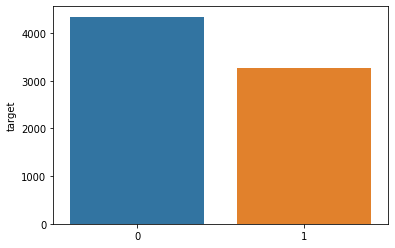

In [0]:
sns.barplot(train['target'].value_counts().index,train['target'].value_counts())

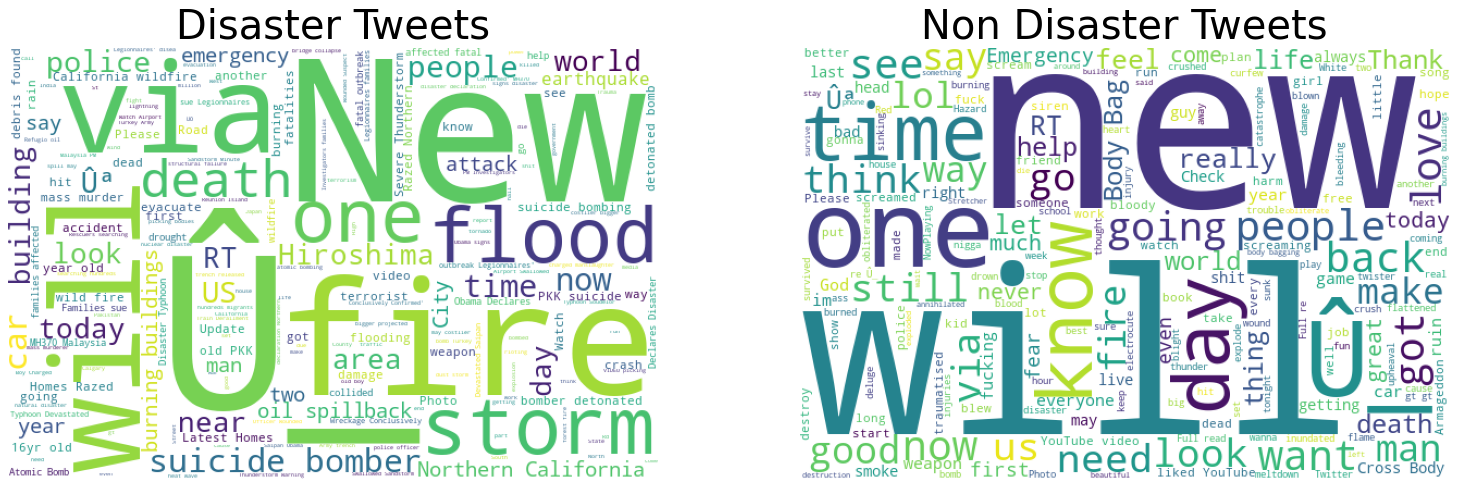

In [0]:
from wordcloud import WordCloud,STOPWORDS 
stopwords = set(STOPWORDS) 
stop_word=list(stopwords)+['http','co','https','wa','amp','û','Û','HTTP','HTTPS']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',stopwords = stop_word,
                        width=600,
                        height=400).generate(" ".join(train[train['target']==1]['text']))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);

wordcloud2 = WordCloud( background_color='white',stopwords = stop_word,
                        width=600,
                        height=400).generate(" ".join(train[train['target']==0]['text']))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);

In [0]:
train['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

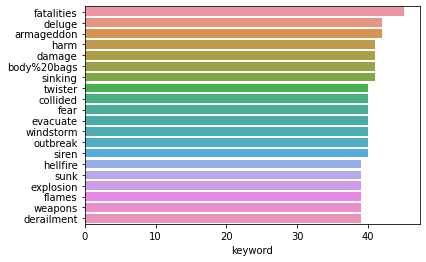

In [0]:
sns.barplot(y=train['keyword'].value_counts()[:20].index,x=train['keyword'].value_counts()[:20],orient='h')

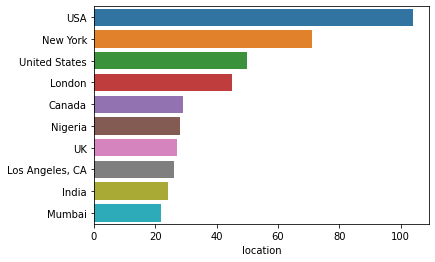

In [0]:
#les pays qui contiennet le plus des menaces ordonnés
sns.barplot(y=train['location'].value_counts()[:10].index,x=train['location'].value_counts()[:10],
            orient='h')

# 1- Exploratory Data Analysis of tweets

* Tout d'abord, nous ferons une analyse très basique, c'est-à-dire une analyse au niveau des caractères, des mots et des phrases.

**1. Character analysis**

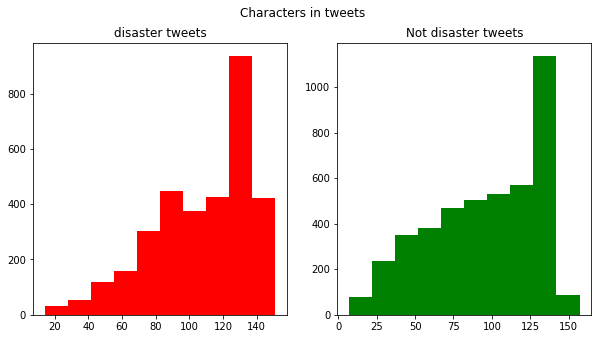

In [0]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train[train['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=train[train['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

=> La distribution des deux semble être presque la même, 120 à 140 caractères dans un tweet sont les plus courants parmi les deux.

**2. Average word length in a tweet : 
**

Text(0.5, 0.98, 'Average word length in each tweet')

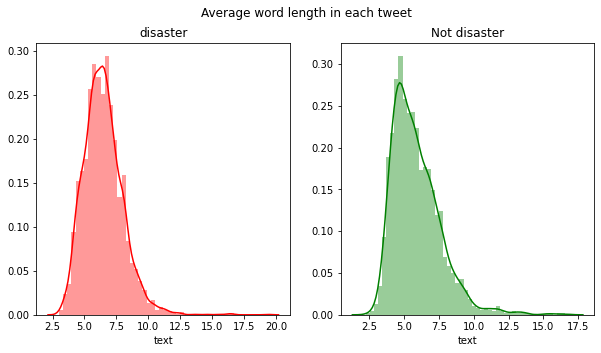

In [0]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train[train['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')
word=train[train['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')

** 3. Common stopwords in tweets : **

In [0]:
def create_corpus(target):
    corpus=[]
    
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<BarContainer object of 10 artists>

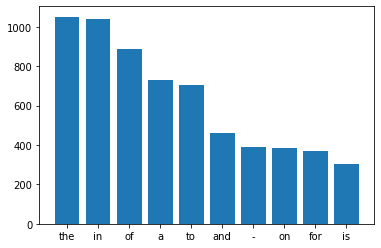

In [0]:
from collections import defaultdict
from collections import  Counter
corpus1=create_corpus(1)

dic=defaultdict(int)
for word in corpus1:
    if word in corpus1:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    
x,y=zip(*top)
plt.bar(x,y)

=> Le mot le plus dominé est "THE"

**4. Analyzing punctuations : **


<BarContainer object of 20 artists>

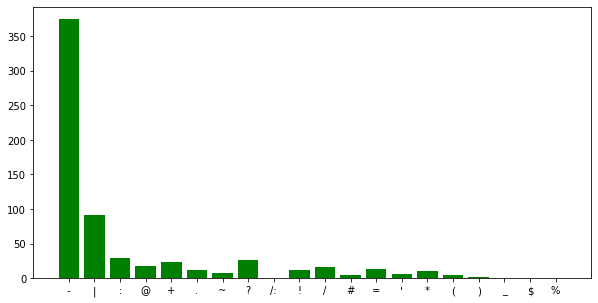

In [0]:
plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green')

[](http://)

# 2-  Data Preprocessing

> * **Remove URL **

In [0]:
import re
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [0]:
def remove_URLs(text):
    url = re.compile(r'http?://\S+|www\.\S+')
    return url.sub(r'',text)

In [0]:
train['text'] = train['text'].apply(remove_URL)
test['text'] = test['text'].apply(remove_URL)

In [0]:
train['text'] = train['text'].apply(remove_URLs)
test['text'] = test['text'].apply(remove_URLs)

In [0]:
train['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610          M1.94 [01:04 UTC]?5km S of Volcano Hawaii. 
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

> > * **Remove emojis **

In [0]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [0]:
train['text'] = train['text'].apply(remove_emoji)
test['text'] = test['text'].apply(remove_emoji)

In [0]:
train['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610          M1.94 [01:04 UTC]?5km S of Volcano Hawaii. 
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

> > * **Remove contractions **

In [0]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are",
"thx"   : "thanks"
}

In [0]:
def remove_contractions(text):
    return contractions[text.lower()] if text.lower() in contractions.keys() else text

In [0]:
train['text']=train['text'].apply(remove_contractions)
test['text']=test['text'].apply(remove_contractions)

In [0]:
train['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610          M1.94 [01:04 UTC]?5km S of Volcano Hawaii. 
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

> > * **Remove Punctuations **

In [0]:
import string
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [0]:

train['text'] = train['text'].apply(remove_punct)
test['text'] = test['text'].apply(remove_punct)

In [0]:
train['text']

0       Our Deeds are the Reason of this earthquake Ma...
1                   Forest fire near La Ronge Sask Canada
2       All residents asked to shelter in place are be...
3       13000 people receive wildfires evacuation orde...
4       Just got sent this photo from Ruby Alaska as s...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    ariaahrary TheTawniest The out of control wild...
7610                M194 0104 UTC5km S of Volcano Hawaii 
7611    Police investigating after an ebike collided w...
7612    The Latest More Homes Razed by Northern Califo...
Name: text, Length: 7613, dtype: object

> Les mots les plus frequents 

In [0]:
freq = pd.Series(' '.join(train['text']).split()).value_counts()[:20]
freq

the     2595
a       1874
to      1815
in      1777
of      1731
and     1313
I       1225
for      825
is       824
on       790
you      666
The      581
my       549
with     518
that     515
at       491
it       487
by       472
be       376
from     373
dtype: int64

> Les mots  inhabituels 

In [0]:
freq1 =  pd.Series(' '.join(train 
         ['text']).split()).value_counts()[-20:]
freq1

holidays          1
Trends            1
Trynna            1
coworkers         1
Kanger            1
whoops            1
tony              1
pride             1
scaligero         1
nataly            1
Oral              1
Strengthening     1
Oktaviana         1
regr              1
shortfalls        1
pennies           1
tonymcguinness    1
Wowthe            1
Azimel            1
Forrest           1
dtype: int64

In [0]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [0]:
import nltk
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))

thislist = ['were', 'the', 'amp', 'dont', 'got', 'know', 'gon', 'na', 'wan', 'like', 'im', 'hers', 'why', 'over', "'d",'our', 'these', 'nevertheless', 'its', 'them', 'empty', 'how', 'whereas', 'whether', 'fifteen', 'about', 'four', 'give', 'otherwise', 'move', 'do', 'say', '‘ve', 'hence', 'n‘t', 'between', 'bottom', 'some', 'against', 'whole', 'i', 'into', 'they', 'already', 'she', 'either', 'an', 'both', 'him', 'due', 'using', 'five', 'across', 'front', 'in', 'off', 'only', 'really', 'twelve', 'twenty', 'show', 'whereupon', '‘m', 'n’t', 'himself', '’m', 'from', 'often', 'three', 'various', 'thereupon', 'should', 'put', 'take', 'who', 'above', 'their', 'been', 'towards', 'however', "n't", 'her', 'go', 'thereby', 'just', 'yourselves', 'become', 'thru', 'while', 'nowhere', 'neither', 'anyway', 'because', 'ca', 'which', 'moreover', 'forty', 'besides', 'us', 'more', 'third', 'wherein', 'whoever', 'used', 'every', 'whose', 'onto', 'your', 'hereafter', 'itself', 'sometimes', 'name', 'too', 'own', 'somewhere', 'there', 'we', 'you', '’ve', 'ourselves', 'sixty', 'would', 'first', 'must', 'whereafter', 'wherever', 'his', 'around', 'has', 'yours', 'became', 'doing','the', 'below', 'then', 'everyone', 'else', 'any', 'latterly', 'noone', 'part', 'might', "'ve", 'becoming', 'same', 'top', 'yourself', 'he', 'each', 'anyone', 'my', 'seeming', 'six', 'the', 'during', 'afterwards', 'throughout', 'formerly', 'seem', 'therefore', 'another', 'keep', 'without', 'being', 'can', 'had', 'per', "'s", 'other', 'side', '’s', 'also', 'herself', '’ll', 'eight', 'what', 'please', 'a', 'therein', 'back', 'me', 'never', 'not', 'does', 'enough', 'meanwhile', 'toward', 'even', 'get', 'and', 'it', 'perhaps', 'this', 'regarding', 'somehow', 'cannot', 'anyhow', 'through', 'whenever', 'thereafter', 'rather', 'by', 'still', 'where', 'than', 'made', 'of', 'will', 'within', 'are', 'amongst', 'although', 'former', 'full', 'nobody', 'was', 'to', 'is', 'at', 'hundred', 'all', 'on', 'such', 'after', 'almost', 'most', 'no', 'our', 'see', 'thus', 'upon', "'ll", 'whence', 'make', '‘s', 'could', 'quite', 'or', 'beyond', 'thence', 'mostly', 'though', 'alone', 'for', 'under', 'seemed', 'until', 'much', 'nine', 'least', 'that', 'nor', 'further', 'themselves', 'whatever', 'whom', 'anywhere', 'myself', 'eleven', 'none', 'with', 'as', 'have', '‘ll', "'m", 'up', 'if', 'several', 'whereby', 'now', 'always', 'amount', 'done', 'hereupon', 'others', 'may', 'one', 'everything', 'so', 'hereby', 'anything', 'fifty', 'last', 'am', 'beforehand', 'few', 'ever', 'together', 'unless', 'ten', 'behind', 'when', 'those', 'mine', 'everywhere', 'be', 'less', 'nothing', 'something', 'very', "'re", 'here', '‘re', 'since', 'seems', 'down', 'did', 'before', 'serious', '‘d', '’d', 'many', 'call', 'along', 'once', 'herein', 'out', 'namely', 'someone', 'becomes', 'whither', 're', 'two', 'but', 'again', 'elsewhere', 'well', 'next', 'sometime', 'indeed', 'ours', 'yet', '’re', 'via', 'latter', 'except', 'among', 'beside']
stop_words.update(thislist)

In [0]:
def clean_text(text):
    '''Make text lower case , removw text in squre backets ,remove links, remove punctuation
    and remove words containing numbers
    '''
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<,*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    return text

# Applying the cleaning function to both test and training datasets
train['text'] = train['text'].apply(lambda x: clean_text(x))
test['text'] = test['text'].apply(lambda x: clean_text(x))

# Let's take a look at the updated text
train['text'].head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

> > * **Tokenzing the text **

In [0]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
train['text'] = train['text'].apply(lambda x: tokenizer.tokenize(x))
test['text'] = test['text'].apply(lambda x: tokenizer.tokenize(x))
train['text'].head()

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

> > * **Remove stopwords **

In [0]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words


train['text'] = train['text'].apply(lambda x : remove_stopwords(x))
test['text'] = test['text'].apply(lambda x : remove_stopwords(x))
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgiv...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1


In [0]:
train1=pd.read_csv("train.csv")
test1=pd.read_csv("test.csv")

In [0]:
from nltk.tokenize import sent_tokenize,word_tokenize

tweets_train = train1['text'].values
target = train1['target'].values

tweets_test = test1['text'].values


> > * **Lemmatizing and stemming the text **

In [0]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

for i in range(len(tweets_train)):
    
    sentences = sent_tokenize(tweets_train[i])
    
    word_list = []
    for sent in sentences:
        
        words = word_tokenize(sent)
        
        for word in words:
            if words not in word_list:
                word_list.append(word)
                
    
    word_list = [lemmatizer.lemmatize(w) for w in word_list if w not in stop_words]
    
    tweets_train[i] = ' '.join(w for w in word_list)
    
for i in range(len(tweets_test)):
    
    sentences = sent_tokenize(tweets_test[i])
    
    word_list = []
    for sent in sentences:
        
        words = word_tokenize(sent)
        
        for word in words:
            
            if words not in word_list:
                word_list.append(word)
                
    
    word_list = [lemmatizer.lemmatize(w) for w in word_list if w not in stop_words]
    
    tweets_test[i] = ' '.join(w for w in word_list)

In [0]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

for i in range(len(tweets_train)):
    
    sentences = sent_tokenize(tweets_train[i])
    
    word_list = []
    for sent in sentences:
        
        words = word_tokenize(sent)
        
        for word in words:
            
            if words not in word_list:
                word_list.append(word)
                
    
    word_list = [porter.stem(w) for w in word_list if w not in stop_words]
    
    tweets_train[i] = ' '.join(w for w in word_list)

for i in range(len(tweets_test)):
    
    sentences = sent_tokenize(tweets_test[i])
    
    word_list = []
    for sent in sentences:
        
        words = word_tokenize(sent)
        
        for word in words:
            
            if words not in word_list:
                word_list.append(word)
                
    
    word_list = [lemmatizer.lemmatize(w) for w in word_list if w not in stop_words]
    
    tweets_test[i] = ' '.join(w for w in word_list)    
    

In [0]:
#combiner les résultats
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

train['text'] = train['text'].apply(lambda x : combine_text(x))
test['text'] = test['text'].apply(lambda x : combine_text(x))
train['text']
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


In [0]:
train.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,two giant cranes holding bridge collapse nearb...,1
7609,10870,NaN,NaN,ariaahrary thetawniest control wild fires cali...,1
7610,10871,NaN,NaN,volcano hawaii,1
7611,10872,NaN,NaN,police investigating ebike collided car little...,1
7612,10873,NaN,NaN,latest homes razed northern california wildfir...,1


# 3- Modelisation

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
train_vectors = count_vectorizer.fit_transform(train['text'])
test_vectors = count_vectorizer.transform(test["text"])

## Keeping only non-zero elements to preserve space 
print(train_vectors[0].todense())

[[0 0 0 ... 0 0 0]]


In [0]:
# XG Boost
import  xgboost as xgb
from xgboost import XGBClassifier

# Sklearn
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import  f1_score
from sklearn import preprocessing ,decomposition, model_selection,metrics,pipeline
from sklearn.model_selection import GridSearchCV

In [0]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
train_tfidf = tfidf.fit_transform(train['text'])
test_tfidf = tfidf.transform(test["text"])

In [0]:
# Fitting a simple Logistic Regression on Counts
clf = LogisticRegression(C=1.0)
scores = model_selection.cross_val_score(clf, train_vectors, train["target"], cv=5, scoring="f1")
scores.mean()

0.5809371185248724

In [0]:
clf.fit(train_vectors, train["target"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
clf.predict(test_vectors[1])

array([1])

In [0]:
# Fitting a simple Logistic Regression on TFIDF
clf_tfidf = LogisticRegression(C=1.0)
scores = model_selection.cross_val_score(clf_tfidf, train_tfidf, train["target"], cv=5, scoring="f1")
scores.mean()

0.5428192197065795

In [0]:
# Fitting a simple Naive Bayes on Counts
clf_NB = MultinomialNB()
scores = model_selection.cross_val_score(clf_NB, train_vectors, train["target"], cv=5, scoring="f1")
scores.mean()

0.6579718949101416

In [0]:
clf_NB.fit(train_vectors, train["target"])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# Fitting a simple Naive Bayes on TFIDF
clf_NB_TFIDF = MultinomialNB()
scores = model_selection.cross_val_score(clf_NB_TFIDF, train_tfidf, train["target"], cv=5, scoring="f1")
scores.mean()

0.619768063794133

In [0]:
clf_NB_TFIDF.fit(train_tfidf, train["target"])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# Fitting XGBoost on Counts
clf_xgb = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
scores = model_selection.cross_val_score(clf_xgb, train_vectors, train["target"], cv=5, scoring="f1")
scores

array([0.4606866 , 0.36573628, 0.43656716, 0.39664218, 0.52490421])

In [0]:
# Fitting XGBoost on TFIDF
clf_xgb_TFIDF = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
scores = model_selection.cross_val_score(clf_xgb_TFIDF, train_tfidf, train["target"], cv=5, scoring="f1")
scores

array([0.50765864, 0.34965035, 0.42406877, 0.42226891, 0.52408478])

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
import random

In [0]:
X = train['text']  
y = train['target']
test_x = test['text']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, shuffle = True)

In [0]:
count_vectorizer = CountVectorizer(stop_words='english')#, min_df = 0.05, max_df = 0.9)
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
count_train_sub = count_vectorizer.transform(X)
count_sub = count_vectorizer.transform(test_x)

In [0]:
import xgboost as xgb
xgb_classifier=xgb.XGBClassifier(objective='binary:logistic',learning_rate = 0.1,gamma=0.01,max_depth = 5,booster="gbtree")
xgb_classifier.fit(count_train ,y_train)
xgb_pred = xgb_classifier.predict(count_test)
xgb_score = accuracy_score(y_test,xgb_pred)
print('XGBoost Count Score: ',xgb_score)
xgb_cm = confusion_matrix(y_test, xgb_pred)
xgb_cm


XGBoost Count Score:  0.7447478991596639


array([[1026,   65],
       [ 421,  392]])

In [0]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(count_train ,y_train)
dt_pred = dt_clf.predict(count_test)
dt_score = accuracy_score(y_test,dt_pred)
print('Decision Tree Count Score: ',dt_score)
dt_cm = confusion_matrix(y_test, dt_pred)
dt_cm


Decision Tree Count Score:  0.7442226890756303


array([[895, 196],
       [291, 522]])

In [0]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=1000,learning_rate=1,algorithm='SAMME.R')
ada_clf.fit(count_train ,y_train)
ada_pred = ada_clf.predict(count_test)
ada_score = accuracy_score(y_test,ada_pred)
print('AdaBoost Decision Tree Count Score: ',ada_score)
ada_cm = confusion_matrix(y_test, ada_pred)
ada_cm

AdaBoost Decision Tree Count Score:  0.7573529411764706


array([[912, 179],
       [283, 530]])

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(count_train ,y_train)
rf_pred = rf_clf.predict(count_test)
rf_score = accuracy_score(y_test,rf_pred)
print('Random Forest Count Score: ',rf_score)
rf_cm = confusion_matrix(y_test, rf_pred)
rf_cm

In [0]:
count_nb = MultinomialNB()
count_nb.fit(count_train ,y_train)
count_nb_pred = count_nb.predict(count_test)
count_nb_score = accuracy_score(y_test,count_nb_pred)
print('MultinomialNaiveBayes Count Score: ', count_nb_score)
count_nb_cm = confusion_matrix(y_test, count_nb_pred)
count_nb_cm

MultinomialNaiveBayes Count Score:  0.7899159663865546


array([[928, 163],
       [237, 576]])

In [0]:
count_bnb = BernoulliNB()
count_bnb.fit(count_train ,y_train)
count_bnb_pred = count_bnb.predict(count_test)
count_bnb_score = accuracy_score(y_test,count_bnb_pred)
print('BernoulliNaiveBayes Count Score: ', count_bnb_score)
count_bnb_cm = confusion_matrix(y_test, count_bnb_pred)
count_bnb_cm

BernoulliNaiveBayes Count Score:  0.803046218487395


array([[1008,   83],
       [ 292,  521]])

In [0]:
count_lsvc = LinearSVC()
count_lsvc.fit(count_train ,y_train)
count_lsvc_pred = count_lsvc.predict(count_test)
count_lsvc_score = accuracy_score(y_test,count_lsvc_pred)
print('LinearSVC Count Score: ', count_lsvc_score)
count_lsvc_cm = confusion_matrix(y_test, count_lsvc_pred)
count_lsvc_cm

LinearSVC Count Score:  0.7683823529411765


array([[920, 171],
       [270, 543]])

In [0]:

count_svc = SVC()
count_svc.fit(count_train ,y_train)
count_svc_pred = count_svc.predict(count_test)
count_svc_score = accuracy_score(y_test,count_svc_pred)
print('SVC Count Score: ', count_svc_score)
count_svc_cm = confusion_matrix(y_test, count_svc_pred)
count_svc_cm

SVC Count Score:  0.8009453781512605


array([[1016,   75],
       [ 304,  509]])

In [0]:
count_nusvc = NuSVC()
count_nusvc.fit(count_train ,y_train)
count_nusvc_pred = count_nusvc.predict(count_test)
count_nusvc_score = accuracy_score(y_test,count_nusvc_pred)
print('NuSVC Count Score: ', count_nusvc_score)
count_nusvc_cm = confusion_matrix(y_test, count_nusvc_pred)
count_nusvc_cm

NuSVC Count Score:  0.7972689075630253


array([[992,  99],
       [287, 526]])

In [0]:
count_sgd = SGDClassifier()
count_sgd.fit(count_train ,y_train)
count_sgd_pred = count_sgd.predict(count_test)
count_sgd_score = accuracy_score(y_test,count_sgd_pred)
print('SGD Count Score: ', count_sgd_score)
count_sgd_cm = confusion_matrix(y_test, count_sgd_pred)
count_sgd_cm

SGD Count Score:  0.7636554621848739


array([[916, 175],
       [275, 538]])

In [0]:
count_lr = LogisticRegression()
count_lr.fit(count_train ,y_train)
count_lr_pred = count_lr.predict(count_test)
count_lr_score = accuracy_score(y_test,count_lr_pred)
print('LogisticRegression Count Score: ', count_lr_score)
count_lr_cm = confusion_matrix(y_test, count_lr_pred)
count_lr_cm    

LogisticRegression Count Score:  0.7946428571428571


array([[964, 127],
       [264, 549]])

In [0]:
models = pd.DataFrame({
    'Model': ['Naive Bayes Multinomiale', 'Naive Bayes Bernoulli',
              'Linear Support Vector Classification', 'Support vector Classification', 'Nu-Support Vector Classification.', 
              'Stochastic Gradient Decent', 'Logistic Regression','XGBoost','AdaBoost'],
    'Score': [count_nb_score, count_bnb_score, 
              count_lsvc_score, count_svc_score, count_nusvc_score, 
              count_sgd_score, count_lr_score,xgb_score,ada_score]})
models.sort_values(by="Score",ascending=False)

,Model,Score
1,Naive Bayes Bernoulli,0.803046
3,Support vector Classification,0.800945
4,Nu-Support Vector Classification.,0.797269
6,Logistic Regression,0.794643
0,Naive Bayes Multinomiale,0.789916
2,Linear Support Vector Classification,0.768382
5,Stochastic Gradient Decent,0.763655
8,AdaBoost,0.757353
7,XGBoost,0.744748


In [0]:
from sklearn.metrics import roc_curve, auc

In [0]:
fpr1, tpr1, threshold1 = roc_curve(y_test, count_nb_pred) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, count_bnb_pred) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, count_lsvc_pred)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, count_svc_pred) 
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, threshold5 = roc_curve(y_test, count_nusvc_pred) 
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, threshold6 = roc_curve(y_test, count_sgd_pred)
roc_auc6 = auc(fpr6, tpr6)
fpr7, tpr7, threshold7 = roc_curve(y_test, count_lr_pred)
roc_auc7 = auc(fpr7, tpr7)
fpr8, tpr8, threshold8 = roc_curve(y_test, xgb_pred)
roc_auc8 = auc(fpr8, tpr8)
fpr9, tpr9, threshold9 = roc_curve(y_test, ada_pred)
roc_auc9 = auc(fpr9, tpr9)

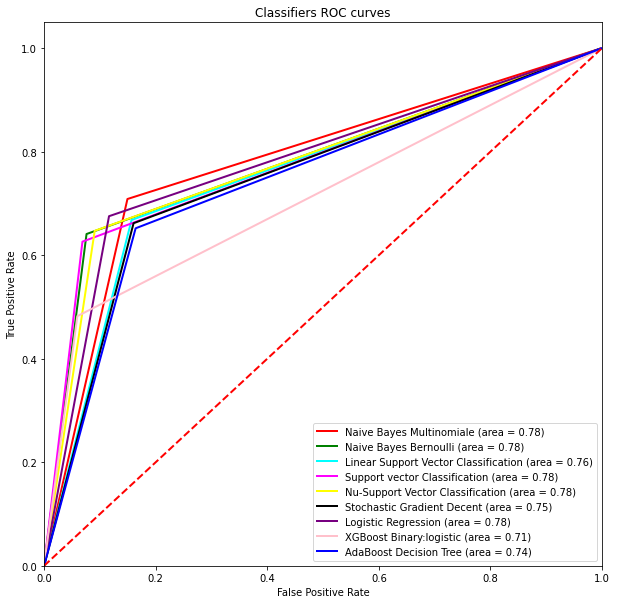

In [0]:
plt.figure(figsize=(10,10)) 
plt.plot(fpr1, tpr1, color='red', lw=2, label='Naive Bayes Multinomiale (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Naive Bayes Bernoulli (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='cyan', lw=2, label='Linear Support Vector Classification (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='magenta', lw=2, label='Support vector Classification (area = %0.2f)'% roc_auc4)
plt.plot(fpr5, tpr5, color='yellow', lw=2, label='Nu-Support Vector Classification (area = %0.2f)'% roc_auc5)
plt.plot(fpr6, tpr6, color='black', lw=2, label='Stochastic Gradient Decent (area = %0.2f)'% roc_auc6)
plt.plot(fpr7, tpr7, color='#770080', lw=2, label='Logistic Regression (area = %0.2f)'% roc_auc7)
plt.plot(fpr8, tpr8, color='pink', lw=2, label='XGBoost Binary:logistic (area = %0.2f)'% roc_auc8)
plt.plot(fpr9, tpr9, color='blue', lw=2, label='AdaBoost Decision Tree (area = %0.2f)'% roc_auc9)


plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

# SUBMISSION

In [0]:
#data pour la submission
sample.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [0]:
def submission(model,test_vectors):
    sample["target"] = model.predict(test_vectors)
    sample.to_csv("submission.csv", index=False)
    
test_vectors=test_tfidf
submission(clf_NB_TFIDF,test_vectors)

subFinal=pd.read_csv('submission.csv')
subFinal.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


In [0]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(count_nusvc, 'our_model.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



['our_model.pkl']